In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('sales_data.csv')

In [3]:
df.head(5)

,Customer Name,Purchase Date,Product Category,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price
0,Allison Hill,2025-02-04,Electronics,372.07,1,True,2025,2,1,241.07
1,Megan Mcclain,2025-01-14,Books,369.55,3,True,2025,1,1,103.55
2,Allen Robinson,2025-03-20,Groceries,19.75,1,True,2025,3,3,16.75
3,Cristian Santos,2025-03-27,Books,303.00,9,True,2025,3,3,83.00
4,Kevin Pacheco,2025-01-02,Groceries,227.36,4,False,2025,1,3,78.36


In [4]:
df['Implied Price'] = df['Sale'] / df['Quantity']
print(df[['Quantity', 'Price', 'Sale', 'Implied Price']])

     Quantity   Price    Sale  Implied Price
0           1  241.07  372.07     372.070000
1           3  103.55  369.55     123.183333
2           1   16.75   19.75      19.750000
3           9   83.00  303.00      33.666667
4           4   78.36  227.36      56.840000
..        ...     ...     ...            ...
995         8  140.07  228.07      28.508750
996        10  211.60  285.60      28.560000
997         3    5.39    7.39       2.463333
998         7  115.96  141.96      20.280000
999         6  389.55  439.55      73.258333

[1000 rows x 4 columns]


In [5]:
df.head(5)

,Customer Name,Purchase Date,Product Category,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price,Implied Price
0,Allison Hill,2025-02-04,Electronics,372.07,1,True,2025,2,1,241.07,372.070000
1,Megan Mcclain,2025-01-14,Books,369.55,3,True,2025,1,1,103.55,123.183333
2,Allen Robinson,2025-03-20,Groceries,19.75,1,True,2025,3,3,16.75,19.750000
3,Cristian Santos,2025-03-27,Books,303.00,9,True,2025,3,3,83.00,33.666667
4,Kevin Pacheco,2025-01-02,Groceries,227.36,4,False,2025,1,3,78.36,56.840000


In [6]:
df = df.drop(['Sale', 'Discount Applied'], axis=1)
df['Total Spent'] = df['Price'] * df['Quantity']
print(df.head())

     Customer Name Purchase Date Product Category  Quantity  Purchase Year  \
0     Allison Hill    2025-02-04      Electronics         1           2025   
1    Megan Mcclain    2025-01-14            Books         3           2025   
2   Allen Robinson    2025-03-20        Groceries         1           2025   
3  Cristian Santos    2025-03-27            Books         9           2025   
4    Kevin Pacheco    2025-01-02        Groceries         4           2025   

   Purchase Month  Purchase Day   Price  Implied Price  Total Spent  
0               2             1  241.07     372.070000       241.07  
1               1             1  103.55     123.183333       310.65  
2               3             3   16.75      19.750000        16.75  
3               3             3   83.00      33.666667       747.00  
4               1             3   78.36      56.840000       313.44  


In [7]:
df = df.drop(['Implied Price'], axis=1)

In [8]:
df.head()

,Customer Name,Purchase Date,Product Category,Quantity,Purchase Year,Purchase Month,Purchase Day,Price,Total Spent
0,Allison Hill,2025-02-04,Electronics,1,2025,2,1,241.07,241.07
1,Megan Mcclain,2025-01-14,Books,3,2025,1,1,103.55,310.65
2,Allen Robinson,2025-03-20,Groceries,1,2025,3,3,16.75,16.75
3,Cristian Santos,2025-03-27,Books,9,2025,3,3,83.00,747.00
4,Kevin Pacheco,2025-01-02,Groceries,4,2025,1,3,78.36,313.44


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df['Month Name'] = df['Purchase Month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})

In [11]:
df = df.sort_values('Purchase Month')

In [12]:
df.head(1)

,Customer Name,Purchase Date,Product Category,Quantity,Purchase Year,Purchase Month,Purchase Day,Price,Total Spent,Month Name
998,Laura Wilson,2025-01-02,Books,7,2025,1,3,115.96,811.72,Jan


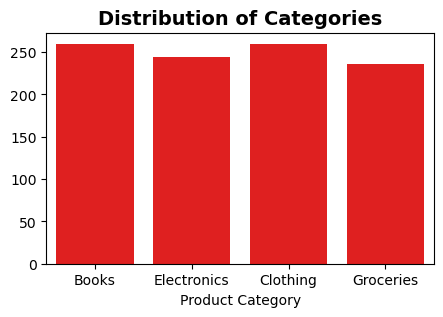

In [13]:
plt.figure(figsize=(5,3))
plot=sns.countplot(x='Product Category',color='r',data=df)
plt.title('Distribution of Categories',fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plot.set_ylabel('')
plt.show()

In [14]:
category_sales = df.groupby('Product Category')['Total Spent'].sum().reset_index()

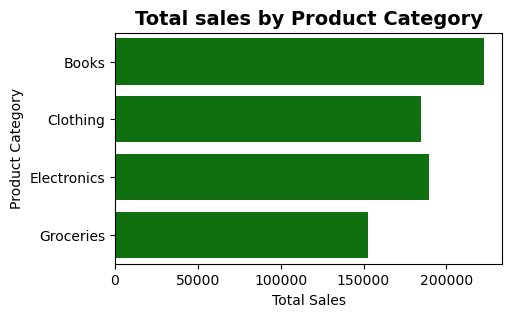

In [15]:
plt.figure(figsize=(5,3))
plot=sns.barplot(y='Product Category', x='Total Spent',color='green',data=category_sales)
plt.title('Total sales by Product Category',fontsize=14, fontweight='bold')
plt.ylabel('Product Category')
plt.xlabel('Total Sales')
plt.show()

In [16]:
monthly_sales = df.groupby('Month Name')['Total Spent'].sum().reset_index()

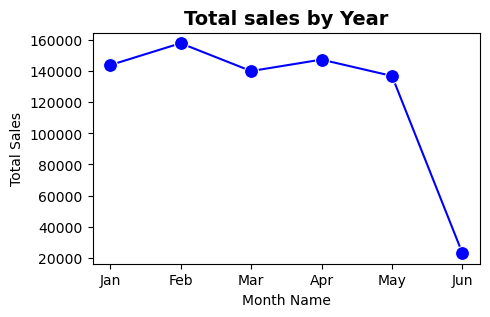

In [17]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_sales['Month Name'] = pd.Categorical(monthly_sales['Month Name'],categories=month_order,ordered=True)

monthly_sales = monthly_sales.sort_values('Month Name')

plt.figure(figsize=(5,3))
plot=sns.lineplot(x='Month Name', y='Total Spent',color='blue', marker='o',markersize=10,data=monthly_sales)
plt.title('Total sales by Year',fontsize=14, fontweight='bold')
plt.xlabel('Month Name')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Sayed\AppData\Local\Temp\ipykernel_23124\3428807147.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Category', y='Price', palette='pastel',data=df)


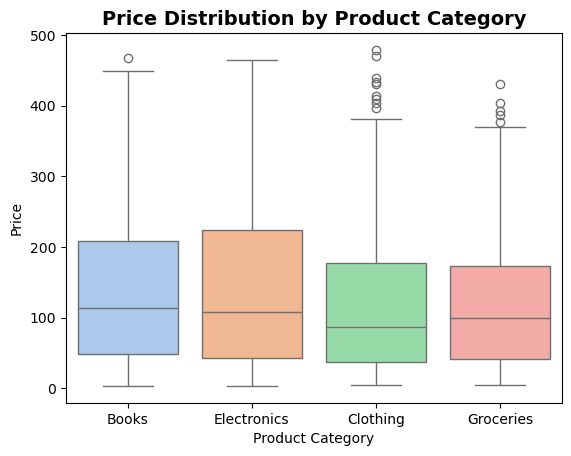

In [18]:
sns.boxplot(x='Product Category', y='Price', palette='pastel',data=df)
plt.title('Price Distribution by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()